## Hypothesis Testing

### Title 1

In [57]:
# Import required libraries
import pandas as pd

from scipy.stats import normaltest
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Filter warnings out
warnings.filterwarnings('ignore')

# Allow matplot plots in jupiter
%matplotlib inline

# Import a library with US state names
from us_state_abbrev import *

# Create a function that maps state abbreviation with name
def map_state_name(ser):
    ser = ser.map(abbrev_to_us_state)
    return ser

# Create a function that maps state name with abbreviation
def map_state_abbrv(ser):
    ser = ser.map(us_state_to_abbrev)
    return ser

# Get list of indexes of non-state rows in dataframe
def get_non_state_indexes(df):
    indexes = df[(df['state'] == 'AS') | (df['state'] == 'DC') |
                  (df['state'] == 'FSM') | (df['state'] == 'GU') |
                  (df['state'] == 'MP') | (df['state'] == 'NYC') |
                  (df['state'] == 'PR') | (df['state'] == 'PW') |
                  (df['state'] == 'RMI') | (df['state'] == 'VI')].index
    return indexes

In [58]:
#Load your dataset into a dataframe
# Read the file into a DataFrame: df
df_us_covid = pd.read_csv('data/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')

#Visually inspect our dataframe using head method
df_us_covid.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,03/11/2021,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0,03/12/2021 03:20:13 PM,Agree,NaN
1,06/11/2021,TX,2965966,NaN,NaN,1463,355.0,51158,NaN,NaN,17,0.0,06/13/2021 12:00:00 AM,Not agree,Not agree
2,02/04/2020,AR,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Not agree
3,05/09/2021,PW,0,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,05/10/2021 02:15:36 PM,NaN,NaN
4,06/25/2021,MP,183,183.0,0.0,0,0.0,2,2.0,0.0,0,0.0,06/27/2021 12:00:00 AM,Agree,Agree


In [59]:
# Create clean datasets
# Drop the columns we do not need in our dataframe
drop_cols = ['pnew_case', 'pnew_death', 'created_at', 'consent_cases', 'consent_deaths']
df_us_covid.drop(drop_cols, axis = 1, inplace = True)

# get list of rows that are not states
non_state_ix = get_non_state_indexes(df_us_covid)

# remove non states from the data
df_us_covid.drop(non_state_ix, inplace = True)

# Change the type of the submittion date column to datetime
df_us_covid['submission_date'] = pd.to_datetime(df_us_covid['submission_date'])

# Replace NaN with numeric values in the dataframe
df_us_covid.fillna(value = 0, axis = 1, inplace = True)

df_us_covid.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,tot_death,conf_death,prob_death,new_death
0,2021-03-11,KS,297229,241035.0,56194.0,0,4851,0.0,0.0,0
1,2021-06-11,TX,2965966,0.0,0.0,1463,51158,0.0,0.0,17
2,2020-02-04,AR,0,0.0,0.0,0,0,0.0,0.0,0
5,2021-05-22,MA,704796,659246.0,45550.0,451,17818,17458.0,360.0,5
7,2021-08-01,GA,1187107,937515.0,249592.0,3829,21690,18725.0,2965.0,7


In [60]:
# Create a new US covid dataframe with totals for each state and for each day
df_us_covid_states = df_us_covid.groupby(['submission_date', 'state']).sum().reset_index()
df_us_covid_states.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,tot_death,conf_death,prob_death,new_death
0,2020-01-22,AK,0,0.0,0.0,0,0,0.0,0.0,0
1,2020-01-22,AL,0,0.0,0.0,0,0,0.0,0.0,0
2,2020-01-22,AR,0,0.0,0.0,0,0,0.0,0.0,0
3,2020-01-22,AZ,0,0.0,0.0,0,0,0.0,0.0,0
4,2020-01-22,CA,0,0.0,0.0,0,0,0.0,0.0,0


### Plotting US states average cases

In [61]:
# Plotting US states average cases
# First create a new dataframe with averages for each state
df_us_covid_avgcases = df_us_covid[['state','new_case']].groupby('state').mean().reset_index()

# Rename new_case column
df_us_covid_avgcases.rename(columns = {'new_case':'cases_avg_per_day'}, inplace = True)

# Sort the dataframe using the average
df_us_covid_avgcases.sort_values(by = 'cases_avg_per_day', inplace = True)

df_us_covid_avgcases.head()

,state,cases_avg_per_day
45,VT,65.420975
10,HI,124.122600
49,WY,162.871492
20,ME,175.020679
0,AK,213.725258


<BarContainer object of 50 artists>

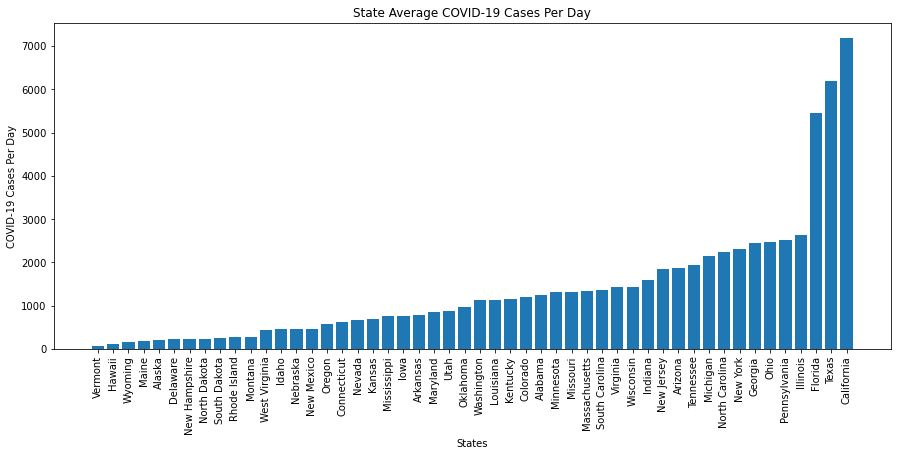

In [62]:
fig = plt.figure(figsize=(15,6))

# add title, xlabel to the plot
plt.title('State Average COVID-19 Cases Per Day')
plt.xlabel('States')
plt.ylabel('COVID-19 Cases Per Day')

# rotate state names
plt.xticks(rotation=90)

# plot
plt.bar(map_state_name(df_us_covid_avgcases['state']), df_us_covid_avgcases['cases_avg_per_day'])

In [63]:
data = dict(type = 'choropleth',
            locations = df_us_covid_avgcases['state'],
            locationmode = 'USA-states',
            text = map_state_name(df_us_covid_avgcases['state']),
            z = df_us_covid_avgcases['cases_avg_per_day'],
            colorscale = 'Blues',
            colorbar = {'title':'COVID-19 Avg. Cases Per Day'})

layout = dict(geo = {'scope':'usa'})

choromap = go.Figure(data = [data], layout = layout)

iplot(choromap)

### Plotting US states average deaths

In [64]:
# Plotting US states average deaths
# First create a new dataframe with averages for each state
df_us_covid_avgdeath = df_us_covid[['state','new_death']].groupby('state').mean().reset_index()

# Rename new_case column
df_us_covid_avgdeath.rename(columns = {'new_death':'death_avg_per_day'}, inplace = True)

# Sort the dataframe using the average
df_us_covid_avgdeath.sort_values(by = 'death_avg_per_day', inplace = True)

df_us_covid_avgdeath.head()

,state,death_avg_per_day
45,VT,0.573117
0,AK,1.251108
10,HI,1.487445
20,ME,1.924668
49,WY,1.989660


<BarContainer object of 50 artists>

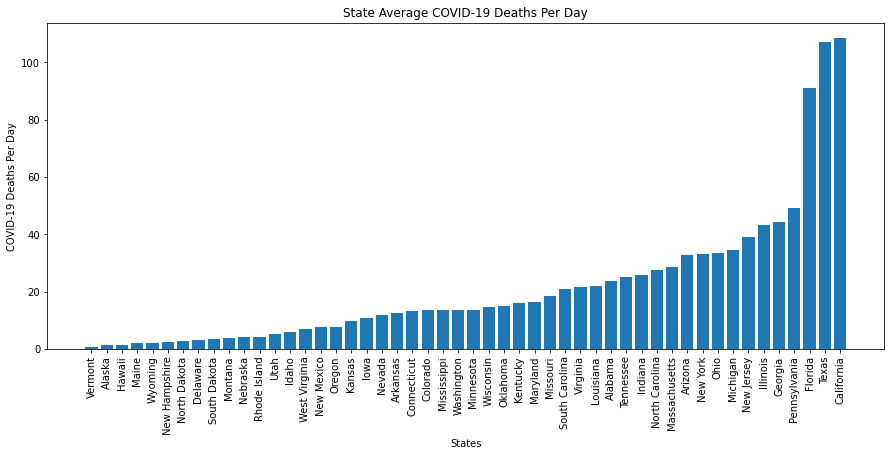

In [65]:
fig = plt.figure(figsize=(15,6))

# add title, xlabel to the plot
plt.title('State Average COVID-19 Deaths Per Day')
plt.xlabel('States')
plt.ylabel('COVID-19 Deaths Per Day')

# rotate state names
plt.xticks(rotation=90)

# plot
plt.bar(map_state_name(df_us_covid_avgdeath['state']), df_us_covid_avgdeath['death_avg_per_day'])

In [66]:
data = dict(type = 'choropleth',
            locations = df_us_covid_avgdeath['state'],
            locationmode = 'USA-states',
            text = map_state_name(df_us_covid_avgdeath['state']),
            z = df_us_covid_avgdeath['death_avg_per_day'],
            colorscale = 'Blues',
            colorbar = {'title':'COVID-19 Deaths Per Day'})

layout = dict(geo = {'scope':'usa'})

choromap = go.Figure(data = [data], layout = layout)

iplot(choromap)

### Plotting US daily cases

In [67]:
# Plotting US daily cases
# First create a new dataframe with totals per day
df_us_covid_dailycase = df_us_covid[['submission_date','new_case']].groupby('submission_date').sum().reset_index()

# Rename new_case column
df_us_covid_dailycase.rename(columns = {'new_case':'new_cases'}, inplace = True)

# Sort the dataframe using the date
df_us_covid_dailycase.sort_values(by = 'submission_date', inplace = True)

df_us_covid_dailycase.head()

,submission_date,new_cases
0,2020-01-22,0
1,2020-01-23,1
2,2020-01-24,1
3,2020-01-25,0
4,2020-01-26,1


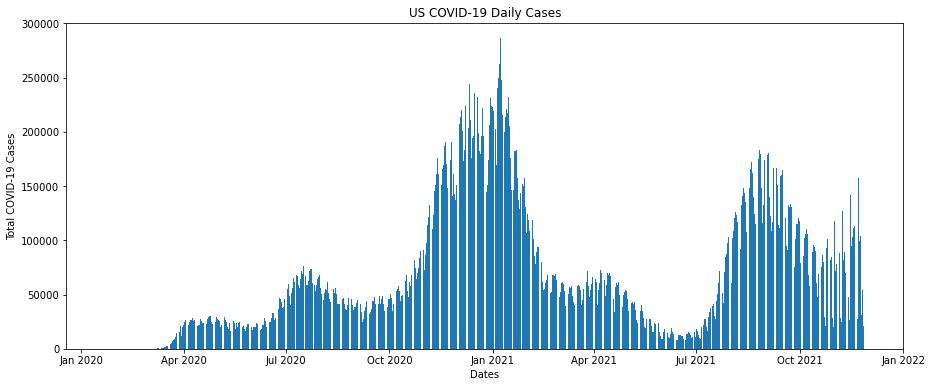

In [68]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(15, 6))

# add title, xlabel to the plot
ax.set_title('US COVID-19 Daily Cases')
ax.set_xlabel('Dates')
ax.set_ylabel('Total COVID-19 Cases')

# plot
ax.bar(df_us_covid_dailycase['submission_date'], df_us_covid_dailycase['new_cases'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.show()

## Adjust data with State population density

In [78]:
# Load Historical Population Density Data from https://www.census.gov/data/tables/time-series/dec/density-data-text.html
df_us_state_pop = pd.read_csv('data/apportionment.csv')
df_us_state_pop.head()

,Name,Geography Type,Year,Resident Population,Percent Change in Resident Population,Resident Population Density,Resident Population Density Rank,Number of Representatives,Change in Number of Representatives,Average Apportionment Population Per Representative
0,Alabama,State,1910,"2,138,093",16.9,42.2,25.0,10.0,1.0,"213,809"
1,Alaska,State,1910,"64,356",1.2,0.1,52.0,NaN,NaN,NaN
2,Arizona,State,1910,"204,354",66.2,1.8,49.0,NaN,NaN,NaN
3,Arkansas,State,1910,"1,574,449",20.0,30.3,30.0,7.0,0.0,"224,921"
4,California,State,1910,"2,377,549",60.1,15.3,38.0,11.0,3.0,"216,051"


In [79]:
# Drop some columns
drop_cols = [
    'Percent Change in Resident Population',
    'Resident Population Density',
    'Resident Population Density Rank',
    'Number of Representatives',
    'Change in Number of Representatives',
    'Average Apportionment Population Per Representative'
]
df_us_state_pop.drop(drop_cols, axis = 1, inplace = True)

# Get US population
us_population = df_us_state_pop.loc[(df_us_state_pop['Year'] == 2020) & (df_us_state_pop['Geography Type'] == 'Nation'), 'Resident Population'].values[0]

# Use only Geography Type = State and Year = 2020 data
df_us_state_pop = df_us_state_pop[(df_us_state_pop['Geography Type'] == 'State') & (df_us_state_pop['Year'] == 2020)]
df_us_state_pop.drop(['Geography Type', 'Year'], axis = 1, inplace = True)

# Use State Abbreviation for states
df_us_state_pop['state'] = map_state_abbrv(df_us_state_pop['Name'])

# Cast Resident Population as integer
df_us_state_pop['Resident Population'] = df_us_state_pop['Resident Population'].str.replace(',', '').astype(int)

# Calculate population per 100,000
df_us_state_pop['population_per_100k'] = df_us_state_pop['Resident Population'] / 100000

# Rename columns
df_us_state_pop.rename(columns = {'Resident Population':'population', 'Name': 'state_name'}, inplace = True)

# Reindex dataframe
df_us_state_pop.reset_index(drop = True, inplace = True)

print('US Population = ', us_population)
df_us_state_pop.head()

US Population =  331,449,281


,state_name,population,state,population_per_100k
0,Alabama,5024279,AL,50.24279
1,Alaska,733391,AK,7.33391
2,Arizona,7151502,AZ,71.51502
3,Arkansas,3011524,AR,30.11524
4,California,39538223,CA,395.38223


### Adjusting US states average cases to population density

In [110]:
# Apply adjusment to US Average Cases per State dataframe
#df_us_covid_avgcases['cases_avg_per_day_adjusted'] = df_us_covid_avgcases['cases_avg_per_day'] / df_us_state_pop[df_us_state_pop['state'] == df_us_covid_avgcases['state']]

for i, r in df_us_covid_avgcases.iterrows():
    #pop_per_100k = df_us_covid_avgcases.iloc[i, 1]
    print(i)

#df_us_covid_avgcases.at[i, 'cases_avg_per_day_adjusted'] = df_us_covid_avgcases['cases_avg_per_day']

df_us_covid_avgcases.head()

45
10
49
20
0
7
29
27
40
38
25
48
12
28
31
36
6
32
15
24
11
2
19
43
35
46
17
16
5
1
22
23
18
39
44
47
14
30
3
41
21
26
33
9
34
37
13
8
42
4


,state,cases_avg_per_day,cases_avg_per_day_adjusted
45,VT,65.420975,0.0
10,HI,124.122600,0.0
49,WY,162.871492,0.0
20,ME,175.020679,0.0
0,AK,213.725258,0.0


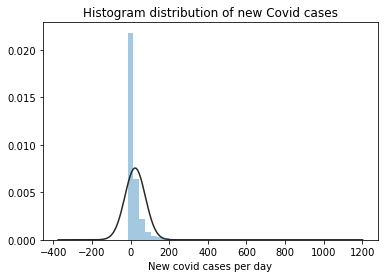

In [26]:
#import required libraries
from scipy.stats import normaltest
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Filter warnings out
warnings.filterwarnings('ignore')

# Allow matplot plots in jupiter
%matplotlib inline

# we set kde to false because by default it uses the kde
sns.distplot(df4['new_death'], fit=stats.norm, kde=False)
# add title, xlabel to the plot
plt.title('Histogram distribution of new Covid cases')
plt.xlabel('New covid cases per day')
plt.show()